Question1

Zipf’slaw: r * freq = A * N
-Learn and understand Zipf’s Law.
-Pick any file (or files) in NLTK package.
-Prove if Zipf’s Law works in Natural Language or not.

In [329]:
import nltk
import string
import csv
import matplotlib.pyplot as plt
import numpy as np
import glob
import math
articles = nltk.corpus.gutenberg.fileids()

In [252]:
#get all the words from gutenberg files
words_all = []
for article in articles:
    words_all.extend(nltk.corpus.gutenberg.words(article))

In [253]:
print(words_all[:20])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich']


In [254]:
#functions to remove punctuation and numbers
def remove_punctuation(words_list):
    words_noPunc = []
    words_punc = string.punctuation
    for word in words_list:
        buffer = 0
        for subword in word:
            if subword in words_punc:
                buffer += 1
        if buffer==0:
            words_noPunc.append(word)
    return words_noPunc
    #words_noPunc = [word for word in words_list if word not in words_punc]
    #return words_noPunc
def remove_int(words_list):
    words_noInt = [word for word in words_list if not any(x.isdigit() for x in word)]
    return words_noInt

In [255]:
print(words_all[:30])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed']


In [263]:
#remove punctuation and numbers in word list
words_new = remove_punctuation(words_all)
words_new = remove_int(words_new)

In [264]:
print(words_new[:20])

['Emma', 'by', 'Jane', 'Austen', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy']


In [265]:
#store all unique words in a dictionary and sort them by frequency
words_unique = {}
for word in words_new:
    word = word.lower()
    if word in words_unique.keys():
        words_unique[word] += 1
    else:
        words_unique[word] = 1
words_unique = sorted(words_unique.items(), key = lambda x : x[1], reverse =True)

In [266]:
print(words_unique[:20])

[('the', 133583), ('and', 95442), ('of', 71267), ('to', 48057), ('a', 33960), ('in', 33580), ('i', 30265), ('that', 28798), ('he', 25857), ('it', 22303), ('his', 21402), ('for', 19527), ('was', 18715), ('with', 17599), ('not', 17373), ('is', 16435), ('you', 16398), ('be', 16115), ('as', 14528), ('but', 13944)]


In [452]:
#print result
count_words = len(words_all)
print('There are', count_words, 'words in gutenberg corpus.')
print('Top 10 used words are:')
for i in range(10):
    #freq = 0
    #freq = count_words/words_unique[i][1]
    print(i+1,'.',words_unique[i][0], 'appeared', words_unique[i][1])

There are 2621613 words in gutenberg corpus.
Top 10 used words are:
1 . the appeared 133583
2 . and appeared 95442
3 . of appeared 71267
4 . to appeared 48057
5 . a appeared 33960
6 . in appeared 33580
7 . i appeared 30265
8 . that appeared 28798
9 . he appeared 25857
10 . it appeared 22303


In [453]:
#Store sorted data in a list
data_sorted = []
for i in range(len(words_unique)):
    freq = words_unique[i][1]
    rank = i + 1
    word = words_unique[i][0]
    data_sorted.append([rank,word,freq])

In [454]:
print(data_sorted[:5])

[[1, 'the', 133583], [2, 'and', 95442], [3, 'of', 71267], [4, 'to', 48057], [5, 'a', 33960]]


In [455]:
#store all sorted data in data_sorted.csv
data = open('data_sorted.csv', 'w')
with open('data_sorted.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(['Rank Word Frequency'])
    w.writerow(['='*20])
    for i in range(len(words_unique)):
        w.writerow(data_sorted[i])
f.close()

In [457]:
path = '/Users/lisha/Desktop/Assignment2/data_sorted.csv'   
files = glob.glob(path)
words_result = []
for file in files: 
    f=open(file, 'r')
    for line in f:
        words_result.append(line)   
f.close()
words_result.remove(words_result[0])
words_result.remove(words_result[0])
words_plotx = []
words_ploty = []
buffer_str = ''
buffer = []
for line in words_result:
    buffer_str = line.split(',')
    buffer.append(buffer_str)
for i in range(len(words_result)):
    words_plotx.append(math.log(int(buffer[i][0])))
    words_ploty.append(math.log(int(buffer[i][2])))

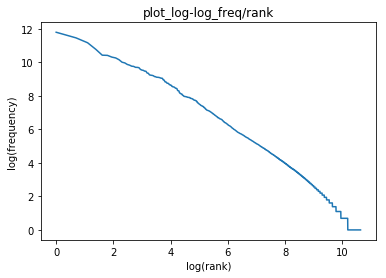

In [463]:
plt.plot(words_plotx,words_ploty)
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title('plot_log-log_freq/rank')
plt.savefig('plot_freq_rank.jpg')
plt.show()

In [464]:
print('The slot of plot_freq_rank is close to -1. So Zipfs law works in gutenberg corpus.')

The slot of plot_freq_rank is close to -1. So Zipfs law works in gutenberg corpus.
